In [29]:
""" A. Chargement et préparation des données"""
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()

# Création des DataFrames pour l'entrainement
# 1/ Variables explicatives
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

# 2/ Target
target = pd.DataFrame(boston.target, columns=["MEDV"])

# 3/ Séparation des données en train/test
import sklearn.cross_validation as cv
train_X, test_X, train_y, test_y = cv.train_test_split(boston_df, target, test_size = 0.3)
train_index = train_X.index
test_index = test_X.index

# 4/ Normalisation des variables explicatives

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc = sc.fit(train_X)
train_X = sc.transform(train_X)
test_X = sc.transform(test_X)

train_X = pd.DataFrame(train_X, index = train_index, columns = boston_df.columns)
test_X = pd.DataFrame(test_X, index = test_index, columns = boston_df.columns)

desc_train = train_X.describe()
desc_test = test_X.describe()

In [30]:
'''B. Construction des modèles de ML'''
from sklearn import linear_model as lm

# Régression linéaire

model_lin = lm.LinearRegression()
model_lin = model_lin.fit(train_X, train_y)
score_reglin = model_lin.score(train_X, train_y)
score_reglin_test = model_lin.score(test_X, test_y)
print(("Score train: {}, Score test: {}").format(score_reglin, score_reglin_test))

Score train: 0.7403166182914489, Score test: 0.7135110156885227


In [31]:
# Régression Ridge avec alpha à 0.01

model_ridge001 = lm.Ridge(alpha = 0.01)
model_ridge001 = model_ridge001.fit(train_X, train_y)
score_ridge001 = model_ridge001.score(train_X, train_y)
score_ridge001_test = model_ridge001.score(test_X, test_y)
print(("Score train: {}, Score test: {}").format(score_ridge001, score_ridge001_test))

Score train: 0.7403166145369791, Score test: 0.7135261360727534


In [73]:
# Régression Ridge avec alpha à 10

model_ridge10 = lm.Ridge(alpha = 10)
model_ridge10 = model_ridge10.fit(train_X, train_y)
score_ridge10 = model_ridge10.score(train_X, train_y)
score_ridge10_test = model_ridge100.score(test_X, test_y)
print(("Score train: {}, Score test: {}").format(score_ridge10, score_ridge10_test))

Score train: 0.7381786518403906, Score test: 0.7232749317480772


In [74]:
'''C. Calcul des coefficients appliqués aux variables'''

# Coefficients régression linéaire
coef_lin = pd.DataFrame(index = range(0,len(train_X.columns)), columns = ['coef','index','model'])
coef_lin['coef'] = model_lin.coef_[0]
coef_lin['index'] = range(0,len(train_X.columns))
coef_lin['model'] = 'reg_lin'

# Coefficients régression ridge (alpha à 0.01)
coef_ridge001 =  pd.DataFrame(index = range(0,len(train_X.columns)), columns = ['coef','index','model'])
coef_ridge001['coef'] = model_ridge001.coef_[0]
coef_ridge001['index'] = coef_lin['index']
coef_ridge001['model'] = 'ridge001'

# Coefficients régression ridge (alpha à 100)
coef_ridge10 =  pd.DataFrame(index = range(0,len(train_X.columns)), columns = ['coef','index','model'])
coef_ridge10['coef'] = model_ridge100.coef_[0]
coef_ridge10['index'] = coef_lin['index']
coef_ridge10['model'] = 'ridge100'

# Ajout des coefs dans un DataFrame
compar_coef = pd.concat([coef_lin, coef_ridge001, coef_ridge10])

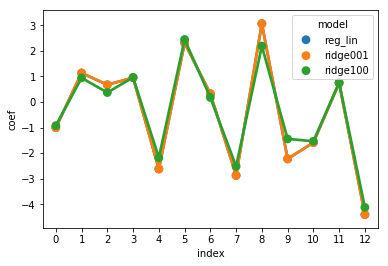

In [75]:
# Visualisation des coefficients

import seaborn as s
s.pointplot(x = 'index',y = 'coef',hue = 'model', style = 'model', data = compar_coef)